<a href="https://colab.research.google.com/github/ksivaram2/Machine-Learning/blob/main/Lab_task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Implement K-NN Classifier for classification of any dataset of your choice.
### a. Load an existing data set
### b. Split the data set to train and test sets
### c. Test your model using test set. Find accuracy and confusion Matrix.
### d. Examine the effect of the value of K on accuracy/performance. Plot the curve “k vs accuracy” and find out the value of k for maximum accuracy for the test samples.

In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv('/content/water_potability.csv')


In [ ]:
df = pd.read_csv("/content/water_potability.csv")

In [ ]:
print("Null values before removal:")
print(df.isnull().sum())

Null values before removal:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
print("\nNull values after removal:")
print(df.isnull().sum())


Null values after removal:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [ ]:
df


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop('Potability',axis='columns')
y = df.Potability
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
y


3       0
4       0
5       0
6       0
7       0
       ..
3267    1
3268    1
3269    1
3270    1
3271    1
Name: Potability, Length: 2011, dtype: int64

In [ ]:
x

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425
...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

classifier = SVC()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.5732009925558312
Confusion Matrix:
[[231   0]
 [172   0]]


Value of k for maximum accuracy: 4
Maximum accuracy: 0.65


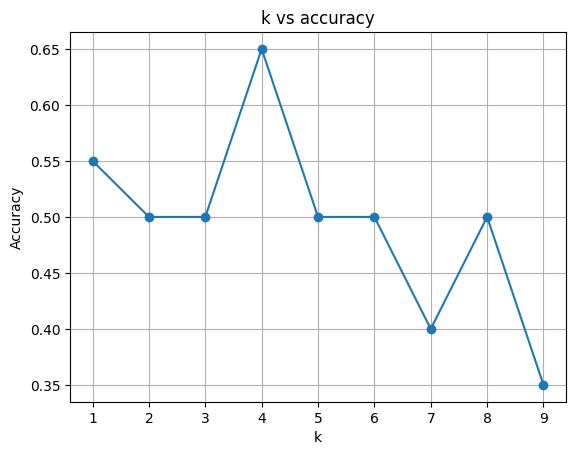

In [ ]:
import numpy as np

def knn_classifier(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:

        distances = np.sqrt(np.sum((X_train - test_point)**2, axis=1))

        nearest_indices = np.argsort(distances)[:k]

        nearest_labels = y_train[nearest_indices]

        prediction = np.argmax(np.bincount(nearest_labels))
        y_pred.append(prediction)
    return np.array(y_pred)


np.random.seed(0)
X_train = np.random.rand(100, 2)
y_train = np.random.randint(0, 2, 100)
X_test = np.random.rand(20, 2)
y_test = np.random.randint(0, 2, 20)


def accuracy_score(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total


k_values = range(1, 10)
accuracies = []
for k in k_values:
    y_pred = knn_classifier(X_train, y_train, X_test, k)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)


best_k = k_values[np.argmax(accuracies)]
max_accuracy = max(accuracies)
print("Value of k for maximum accuracy:", best_k)
print("Maximum accuracy:", max_accuracy)


import matplotlib.pyplot as plt

plt.plot(k_values, accuracies, marker='o')
plt.title('k vs accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()